In [3]:
import pandas as pd


In [5]:
df = pd.read_csv("../data/raw/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
df["total_bedrooms"].fillna(df["total_bedrooms"].median(), inplace=True)

C:\Users\harsh\AppData\Local\Temp\ipykernel_2456\2164095440.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["total_bedrooms"].fillna(df["total_bedrooms"].median(), inplace=True)


In [9]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [10]:
y = df["median_house_value"]

In [11]:
X = df.drop("median_house_value", axis=1)

In [12]:
print(X.size,y.size)

185760 20640


In [13]:
print(X.shape, y.shape)

(20640, 9) (20640,)


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
import matplotlib.pyplot as plt

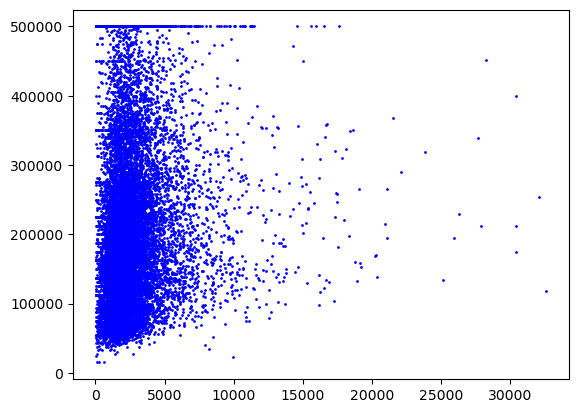

In [17]:
plt.scatter(X_train.iloc[:,3], y_train, color = 'blue', s=1)

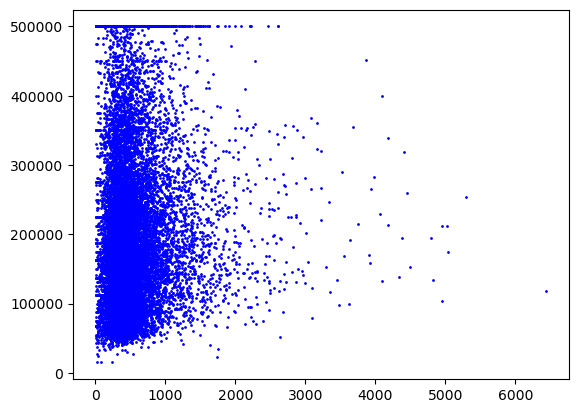

In [18]:
plt.scatter(X_train.iloc[:,4], y_train, color = 'blue', s=1)

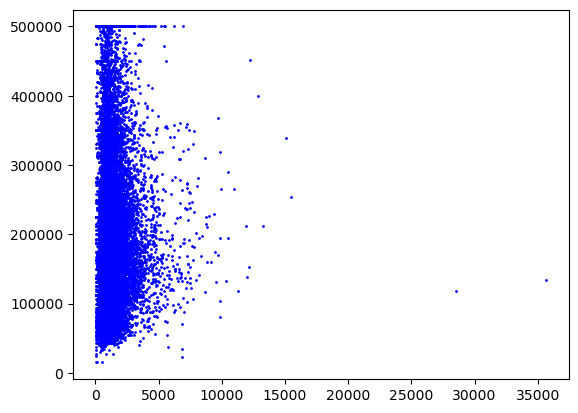

In [19]:
plt.scatter(X_train.iloc[:,5], y_train, color = 'blue', s=1)

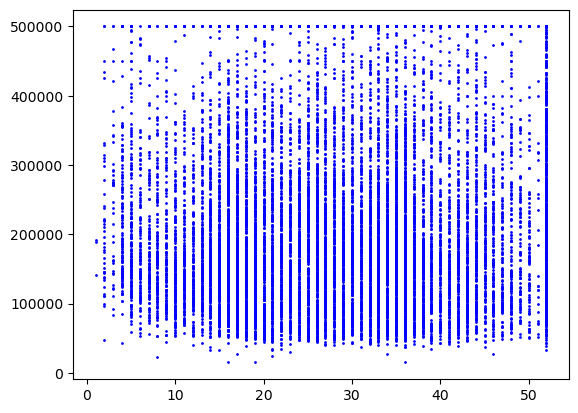

In [20]:
plt.scatter(X_train.iloc[:,2], y_train, color = 'blue', s=1)

In [21]:
from sklearn.linear_model import LinearRegression

Linear regression model using total_bedrooms as main feature and median_house_value as target value

In [22]:
lin_model = LinearRegression()
lin_model.fit(X_train.iloc[:,[4]].values.reshape(-1,1), y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


visualizing linear regression line  

In [23]:
import numpy as np

In [24]:
mask = X_train.iloc[:, 4].values.reshape(-1,1).flatten() < 1200

In [25]:
X_line = np.linspace(X_train[mask].iloc[:,4].min(), X_train[mask].iloc[:,4].max(), 100).reshape(-1,1)

In [26]:
y_line = lin_model.predict(X_line)

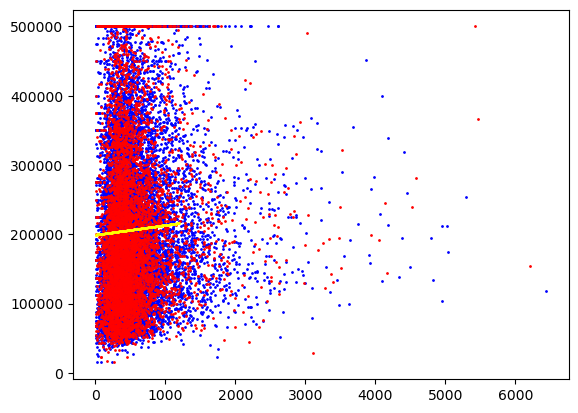

In [27]:
plt.scatter(X_train.iloc[:,4], y_train, color = 'blue', s=1)
plt.scatter(X_test.iloc[:, 4], y_test, color = 'red', s=1)
plt.scatter(X_line.ravel(), y_line, color = 'yellow', s=1)
plt.show()

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scalar = StandardScaler()

X_train_scaled = scalar.fit_transform(X_train.iloc[:,[4]])
X_test_scaled = scalar.transform(X_test.iloc[:,[4]])

In [30]:
lin_model.fit(X_train_scaled, y_train)
y_pred = lin_model.predict(X_test_scaled)

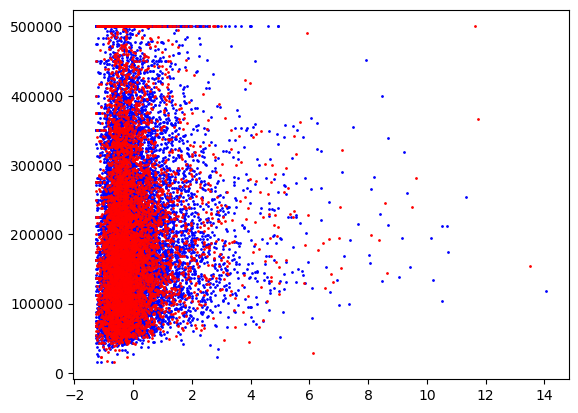

In [31]:
plt.scatter(X_train_scaled, y_train, color='blue', s=1)
plt.scatter(X_test_scaled, y_test, color = 'red', s=1)